### Recently I published a self help book titled Inspiration: Thoughts on Spirituality, Technology, Wealth, Leadership and Motivation. The preview of the book can be read from the Amazon link https://lnkd.in/gj7bMQA

### To can refer to my other notebooks from https://www.kaggle.com/binuthomasphilip/code

Some years back I went for a trip to Kodaikanal in Tamil Nadu.There we had a Fruit Milk Shake which the locals refered to as Butter Fruit.The fruit indeed tasted like Butter.The memory of the fruit remained fresh in my Memory.After many years I found out this fruit are called as Avacado.In this kernel we will be exploring and vizualizaing the dataset and try to Forecast the price of Avacados.In this notebook we will be covering following topics

1.Data Import and Preprocessing 

2.Exploratory Data Analysis 

3.Facebook Prophet USA Price Forecast 

4.Results Visualization

5.Facebook Prophet California Price Forecast

6.Conclusion 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avocado-prices/avocado.csv
/kaggle/input/butterfruit/Butter_fruit.png


# Data Import and Preprocessing 

### How Avocado looks?

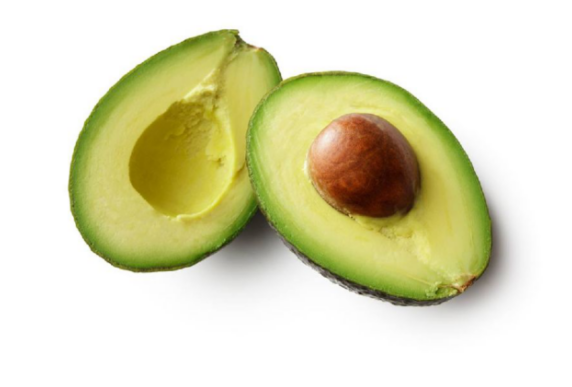

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import numpy as np
img=np.array(Image.open('../input/butterfruit/Butter_fruit.png'))
fig=plt.figure(figsize=(10,10))
plt.imshow(img,interpolation='bilinear')
plt.axis('off')
plt.show()

### Importing Dataset

In [3]:
df=pd.read_csv('../input/avocado-prices/avocado.csv')
df.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In the data set we can see region and vaerage price of Avacado every week.Price is that of a single Avacado.

### Summary of the DataSet

In [4]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 18249
Columns  : 14

Features :
     : ['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']

Missing values    : 0

Unique values :  
 Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64


Luckly there are no missing values in out datset

### Basic Stats

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


Average Price of one avacado is 1.40 Dollars.Minimum price and maximum price being 0.44 and 3.25 respectively.

### Categorical Data

In [6]:
df.select_dtypes(exclude=['int','float']).columns

Index(['Date', 'type', 'region'], dtype='object')

### Importing Python Modules

In [7]:
import random 
import seaborn as sns
from fbprophet import Prophet

Data is not ordered based on date.We need to order the data based on dates

### Sorting Data 

In [8]:
df=df.sort_values('Date')
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California
8814,0,2018-03-25,1.34,1774776.77,63905.98,908653.71,843.45,801373.63,774634.09,23833.93,2905.61,conventional,2018,NewYork


We have data from Jan 2015 to Mar 2018.

# 2.Exploratory Data Analysis 

### Average Price 

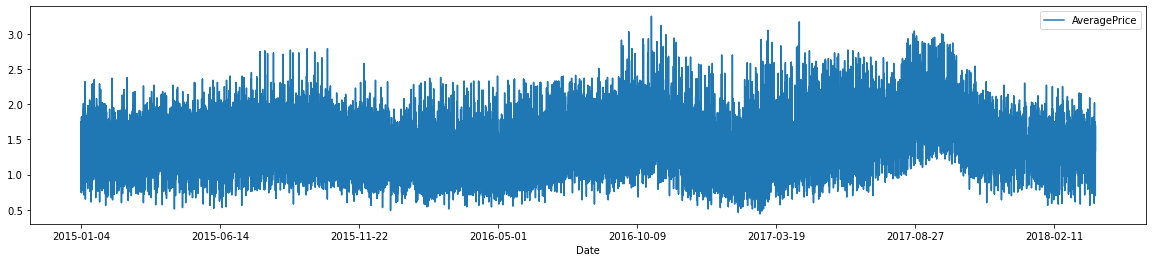

In [9]:
df.plot(x='Date', y='AveragePrice',legend=True,figsize=(20,4));
plt.ioff()

The data is cyclic and has trends.We can see that there as increase in Avocado price in years 2017.Google search on this gave me this information,"The wholesale price of avocados is up 125% since the beginning of the year, according to the American Restaurant Association, which analyzes U.S. Agriculture Department data.A standard box of 48 avocados went for $83.75 this week", the ARA reports.

### Different Regions

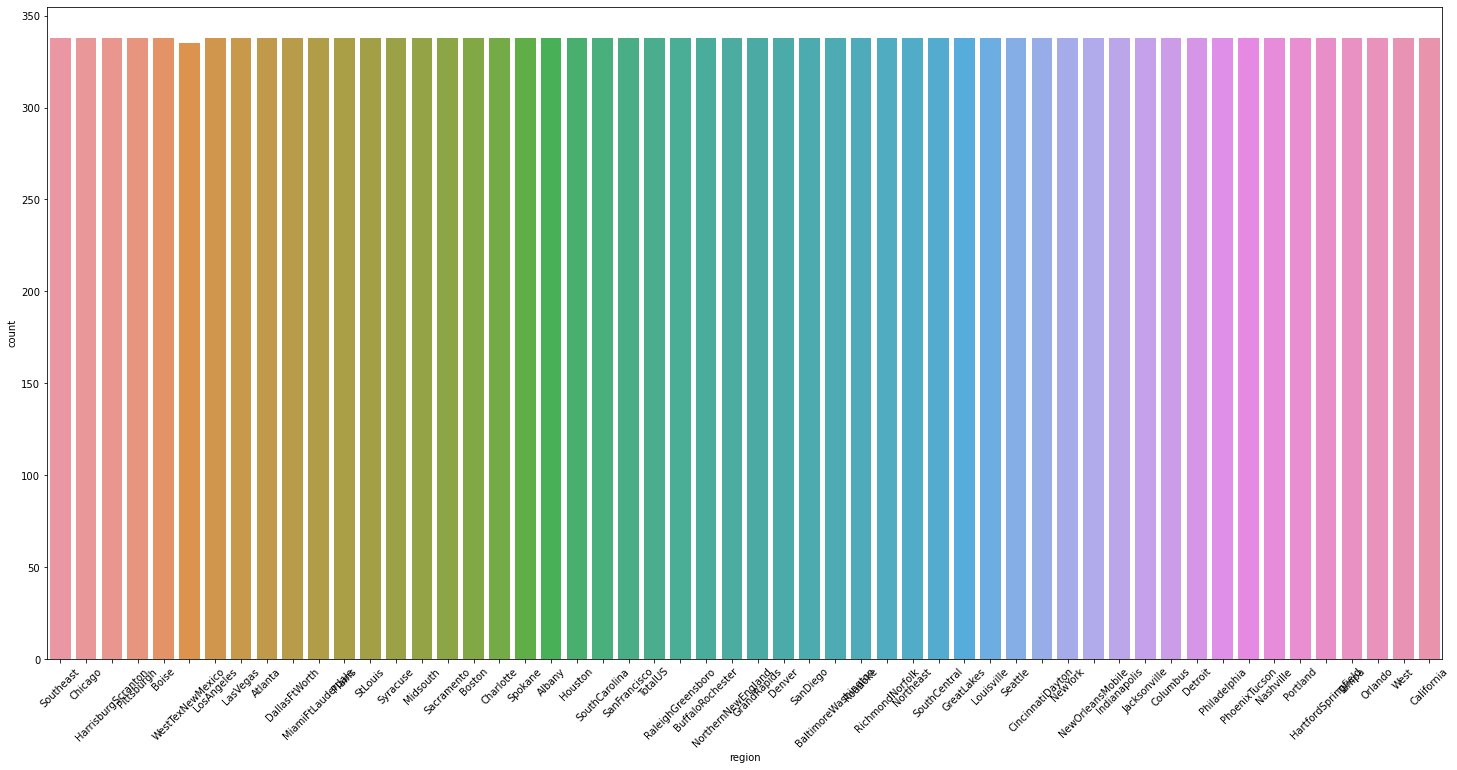

In [10]:
plt.figure(figsize=[25,12])
sns.countplot(x='region',data=df);
plt.xticks(rotation=45)
plt.ioff()

### Count based on year

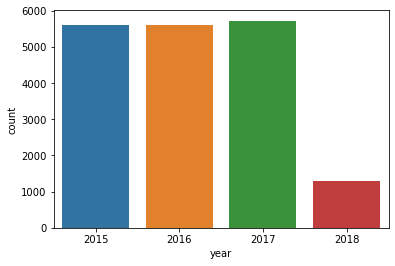

In [11]:
sns.countplot(x='year',data=df);

We see that that the bar for the year 2018 is short as we have data only upto march for the year 2018.

# 3.Facebook Prophet USA Price Forecast

### Creating Input for Facebook Prophet

In [12]:
df_prophet=df[['Date','AveragePrice']]
df_prophet.head(2)

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49


We have extracted the the Date and Average Price as this two information are only needed for us to forecast the price of Avacado.

### Renaiming Columns to suite Prophet Algorithm

In [13]:
df_prophet=df_prophet.rename(columns={'Date':'ds','AveragePrice':'y'})
df_prophet.head(2)

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49


### Fitting Prophet Model

In [14]:
m=Prophet()
m.fit(df_prophet)

### Forecasting For a Year 

In [15]:
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498818,0.911815,1.871649,1.498818,1.498818,-0.113604,-0.113604,-0.113604,-0.113604,-0.113604,-0.113604,0.0,0.0,0.0,1.385214
1,2015-01-11,1.493637,0.905651,1.867898,1.493637,1.493637,-0.105192,-0.105192,-0.105192,-0.105192,-0.105192,-0.105192,0.0,0.0,0.0,1.388445
2,2015-01-18,1.488455,0.881710,1.878671,1.488455,1.488455,-0.104862,-0.104862,-0.104862,-0.104862,-0.104862,-0.104862,0.0,0.0,0.0,1.383592
3,2015-01-25,1.483273,0.868743,1.828992,1.483273,1.483273,-0.123788,-0.123788,-0.123788,-0.123788,-0.123788,-0.123788,0.0,0.0,0.0,1.359485
4,2015-02-01,1.478091,0.861549,1.803851,1.478091,1.478091,-0.152113,-0.152113,-0.152113,-0.152113,-0.152113,-0.152113,0.0,0.0,0.0,1.325978


# 4.Result Vizualization

### Price Forecast for a Year

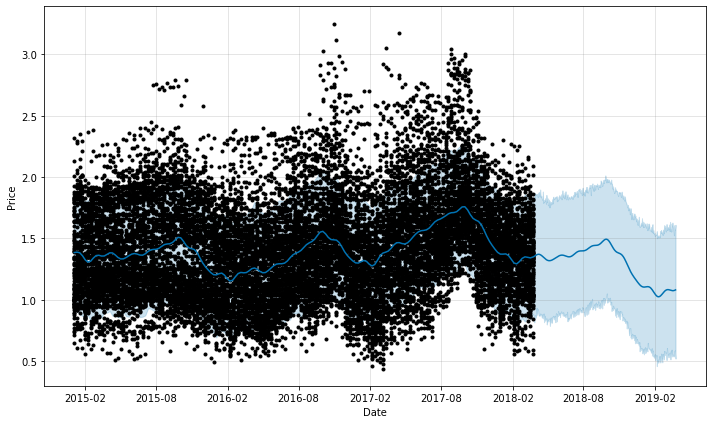

In [16]:
figure=m.plot(forecast,xlabel='Date',ylabel='Price')

So we can see from the graph that we had price for Avacado from Jan-2015 to Mar-2018.With the Prophet algorithm we are able to forecast the prices for the next years.We can see that the prediction is that the prices will go down.

### Plotting Components of Forecast

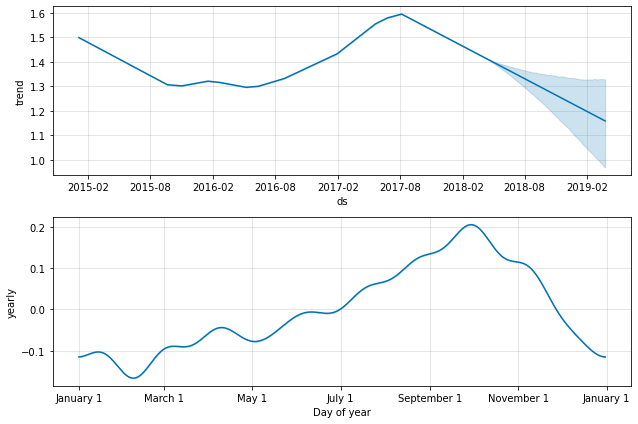

In [17]:
figure=m.plot_components(forecast)

1.The first graph shows the overall trend of the price in the data set and for the future forecast for one year.

2.The second graph show the seasonality of the price in a year,We can see that the price of Avacados Peak in the month of October

# 5.Forecast For California

In [18]:
df['region'].unique()

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

Out of so many regions we will choose California for our analysis.

### Getting California Data

In [19]:
region_sample=df[df['region']=='California']
region_sample.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9489,51,2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.0,organic,2015,California
363,51,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.8,conventional,2015,California


### Sorting Data by Date

In [20]:
region_sample=region_sample.sort_values('Date')

### Plot Average Price California

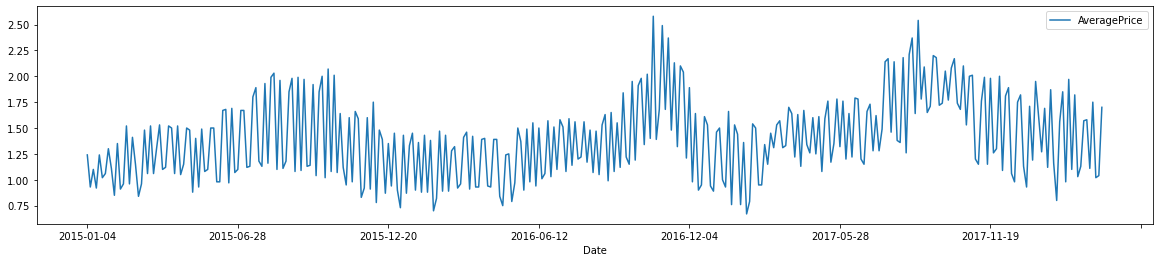

In [21]:
region_sample.plot(x='Date', y='AveragePrice',legend=True,figsize=(20,4));
plt.ioff()

### Forecasting the Price of Avacado for Region of California

In [22]:
region_sample=region_sample[['Date','AveragePrice']]
region_sample.head(2)

,Date,AveragePrice
9489,2015-01-04,1.24
363,2015-01-04,0.93


### Renaming Columns 

In [23]:
region_sample=region_sample.rename(columns={'Date':'ds','AveragePrice':'y'})
region_sample.head(2)

,ds,y
9489,2015-01-04,1.24
363,2015-01-04,0.93


### Model Fit and Forecast

In [24]:
m=Prophet()
m.fit(region_sample)
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.303644,0.688744,1.532087,1.303644,1.303644,-0.180522,-0.180522,-0.180522,-0.180522,-0.180522,-0.180522,0.0,0.0,0.0,1.123122
1,2015-01-11,1.303684,0.709222,1.570480,1.303684,1.303684,-0.174128,-0.174128,-0.174128,-0.174128,-0.174128,-0.174128,0.0,0.0,0.0,1.129557
2,2015-01-18,1.303724,0.697960,1.538593,1.303724,1.303724,-0.194954,-0.194954,-0.194954,-0.194954,-0.194954,-0.194954,0.0,0.0,0.0,1.108771
3,2015-01-25,1.303764,0.645794,1.478155,1.303764,1.303764,-0.228961,-0.228961,-0.228961,-0.228961,-0.228961,-0.228961,0.0,0.0,0.0,1.074803
4,2015-02-01,1.303804,0.639129,1.488509,1.303804,1.303804,-0.250278,-0.250278,-0.250278,-0.250278,-0.250278,-0.250278,0.0,0.0,0.0,1.053526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.792730,1.233026,2.103062,1.776110,1.811600,-0.122265,-0.122265,-0.122265,-0.122265,-0.122265,-0.122265,0.0,0.0,0.0,1.670465
530,2019-03-22,1.793175,1.271711,2.129236,1.776464,1.812127,-0.115998,-0.115998,-0.115998,-0.115998,-0.115998,-0.115998,0.0,0.0,0.0,1.677177
531,2019-03-23,1.793621,1.280957,2.103022,1.776818,1.812661,-0.109642,-0.109642,-0.109642,-0.109642,-0.109642,-0.109642,0.0,0.0,0.0,1.683979
532,2019-03-24,1.794066,1.258109,2.116735,1.777171,1.813194,-0.103263,-0.103263,-0.103263,-0.103263,-0.103263,-0.103263,0.0,0.0,0.0,1.690803


### Plotting the Forecast 

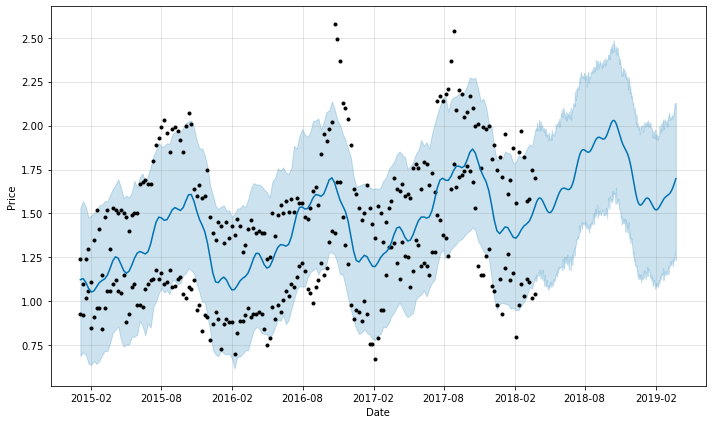

In [25]:
figure=m.plot(forecast,xlabel='Date',ylabel='Price')

So from the forecast Plot we can see that the Price of Avacado would increase in the coming year that is after Mar 2018.This is contrary to the forecast at the country level.So selling avacados in California would be more profitable.

### Plotting the Components of the Forecast

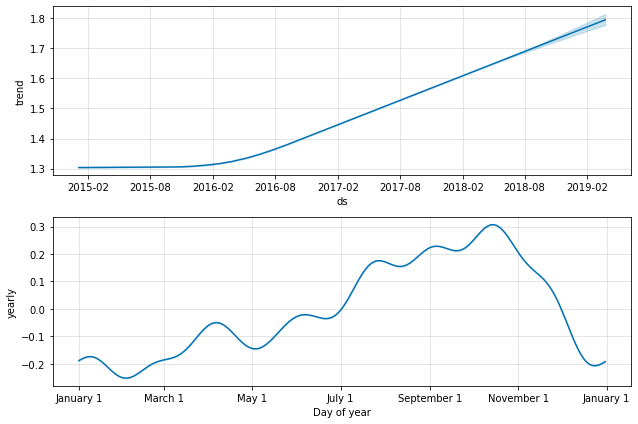

In [26]:
figure=m.plot_components(forecast)

The trend also shows that there will be increase in price of Avacado in California.

The seasonality curve follows almost the same trend in California as in the rest of the country.

# 6.Conclusion

1.So we have used the Facebook Prophet algorithm to forecast the Avacado Price at country and region level.

2.We observed that at countr level the forecast is that the avacado price would fall.

3.But at California region level we see that the forecast is for a price increase.

4.The seasonality at country and California region level remain the same.

5.This forecast would be very useful for making business decisions.

### To can refer to my other notebooks from https://www.kaggle.com/binuthomasphilip/code

# TO BE CONTINUED